In [1]:
from pymongo import MongoClient

#HOST="(...).mongodb.net"
HOST="cluster0.frtdehn.mongodb.net"
PORT=27017
USERNAME="xuwira19"
PASSWORD="changeme1."

if HOST == 'localhost':
    if not USERNAME:
        cli_mongo = MongoClient(HOST, PORT)
    else:
        cli_mongo = MongoClient(HOST, PORT, USERNAME, PASSWORD)
else:
    cli_mongo = MongoClient(f"mongodb+srv://{USERNAME}:{PASSWORD}@{HOST}/test")

In [4]:
print(cli_mongo.list_database_names())

['covid', 'sample_airbnb', 'sample_analytics', 'sample_geospatial', 'sample_guides', 'sample_mflix', 'sample_restaurants', 'sample_supplies', 'sample_training', 'sample_weatherdata', 'admin', 'local']


In [8]:
import pandas as pd

covid =cli_mongo['covid']

covid_itlaia = covid['coviditalia']

df = pd.DataFrame(list(covid_itlaia.find()))

del df['_id']

df

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,None,None,None,None
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None,None,None,None
2,2020-02-24T18:00:00,ITA,17,Basilicata,76,Potenza,PZ,40.639471,15.805148,0,None,None,None,None
3,2020-02-24T18:00:00,ITA,18,Calabria,102,Vibo Valentia,VV,38.676241,16.101574,0,None,None,None,None
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,34,Parma,PR,44.801074,10.328350,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140175,2022-10-08T17:00:00,ITA,9,Toscana,995,In fase di definizione/aggiornamento,None,NaN,NaN,0,None,ITI,ITI1,None
140176,2022-10-08T17:00:00,ITA,10,Umbria,55,Terni,TR,42.560713,12.646688,87206,None,ITI,ITI2,ITI22
140177,2022-10-08T17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,414746,None,ITH,ITH3,ITH31
140178,2022-10-08T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,419455,None,ITH,ITH3,ITH34


### Scatter

<Axes: xlabel='codice_provincia', ylabel='totale_casi'>

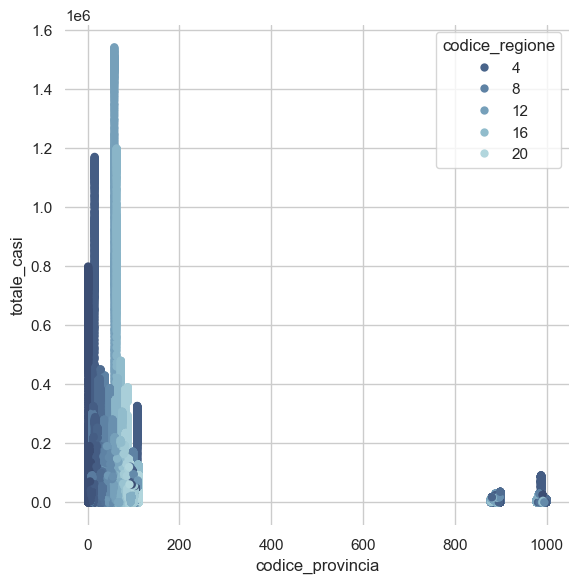

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="codice_provincia", y="totale_casi",
                hue="codice_regione",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

### Scatterplot with marginal ticks

In [ ]:
import seaborn as sns


# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=df, x="mpg", y="acceleration", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=df["horsepower"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

In [24]:
df.dtypes

data                        object
stato                       object
codice_regione               int64
denominazione_regione       object
codice_provincia             int64
denominazione_provincia     object
sigla_provincia             object
lat                        float64
long                       float64
totale_casi                  int64
note                        object
codice_nuts_1               object
codice_nuts_2               object
codice_nuts_3               object
dtype: object

### Mapa de calor

ValueError: Must pass 2-d input. shape=()

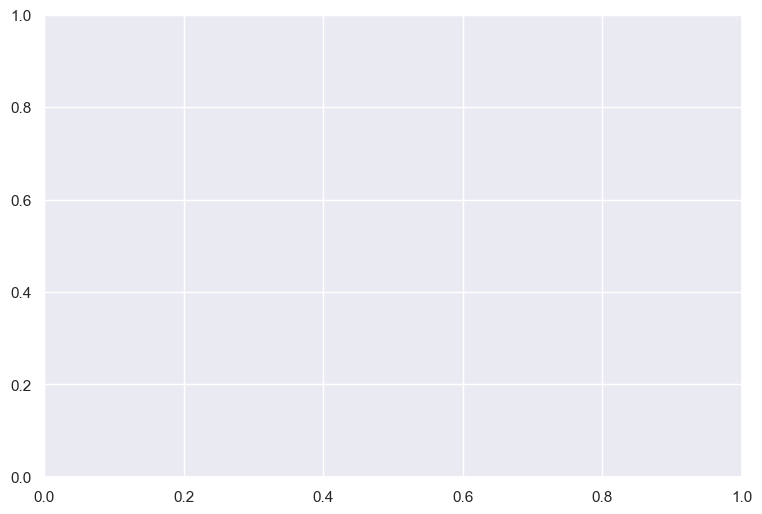

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

df2 = df.copy()
df2 = df2['data'].drop

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df2, annot=True, fmt="d", linewidths=.5, ax=ax)